# GDP and Life Expectancy from the World Health Organization

Analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

The dataset provided has the following columns of data:

- **Country** - nation
- **Year** - the year for the observation
- **Life expectancy at birth (years)** - life expectancy value in years
- **GDP** - Gross Domestic Product in U.S. dollars

Project Objectives:
- Complete a project to add to your portfolio
- Use seaborn and Matplotlib to create visualizations
- Become familiar with presenting and sharing data visualizations
- Preprocess, explore, and analyze data

Explore and Explain Data:
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

In [236]:
#import libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
#import and analyse dataset

In [239]:
life_exp_gdp = pd.read_csv("all_data.csv")

In [240]:
life_exp_gdp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [241]:
life_exp_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [242]:
#Find missing data
print(life_exp_gdp[life_exp_gdp.isnull().any(axis=1)])

Empty DataFrame
Columns: [Country, Year, Life expectancy at birth (years), GDP]
Index: []


In [243]:
#Rename Life expectancy column (facilitate writing)
life_exp_gdp.rename(columns={"Life expectancy at birth (years)": "Life expectancy"}, inplace = True)

In [244]:
#Look for unique values on Country and year
print(life_exp_gdp.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [245]:
print(life_exp_gdp.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [246]:
#Calculate average values for each country for GDP and Life expectancy
gdp_mean = life_exp_gdp.groupby(["Country"])["GDP"].mean().reset_index().rename(columns={"GDP": "GDP mean"})

gdp_mean

,Country,GDP mean
0,Chile,1.697888e+11
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
4,United States of America,1.407500e+13
5,Zimbabwe,9.062580e+09


In [247]:
#Summarize statiscal data
life_exp_gdp.describe(include="all")

,Country,Year,Life expectancy,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


## Has life expectancy increased over time in the six nations?

C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


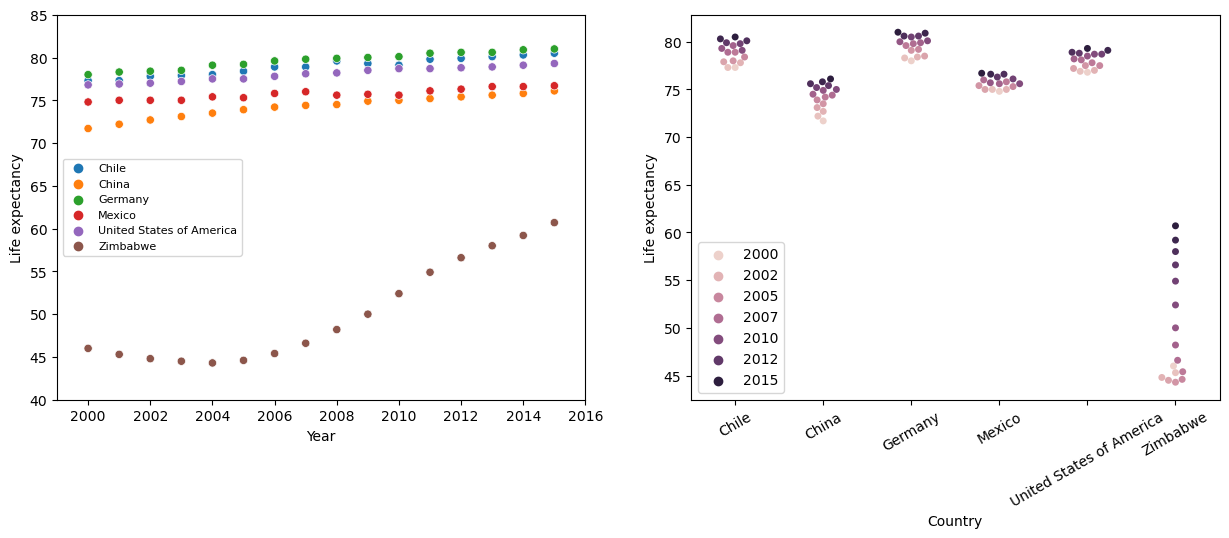

<Figure size 640x480 with 0 Axes>

In [248]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = "Year", y="Life expectancy", hue = "Country", data = life_exp_gdp)
plt.axis([1999,2016,40,85])
plt.legend(fontsize =8, loc=6)

plt.subplot(1,2,2)
sns.swarmplot(data=life_exp_gdp, x="Country", y="Life expectancy", hue="Year")
plt.xticks(rotation = 30)
plt.subplots_adjust(wspace=0.2)
plt.legend(loc=3)
plt.show()
plt.clf()

C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

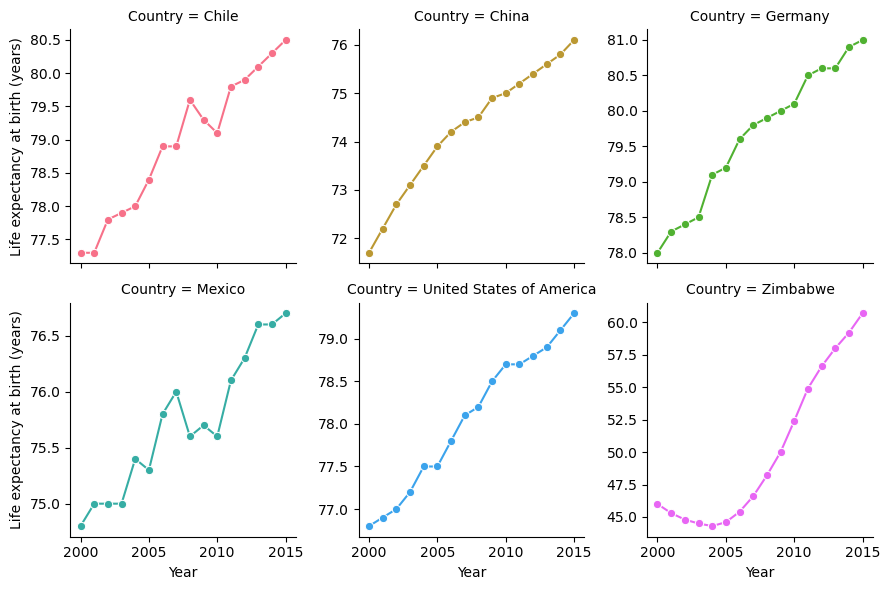

<Figure size 640x480 with 0 Axes>

In [249]:
#Plot each country life expectancy
grid = sns.FacetGrid(life_exp_gdp, col="Country", hue="Country", palette="husl", col_wrap=3, sharey=False)
grid.map(sns.lineplot, "Year", "Life expectancy", marker="o")
grid.set_axis_labels("Year", "Life expectancy at birth (years)")

plt.show()
plt.clf()

## Has GDP increased over time in the six nations?

C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


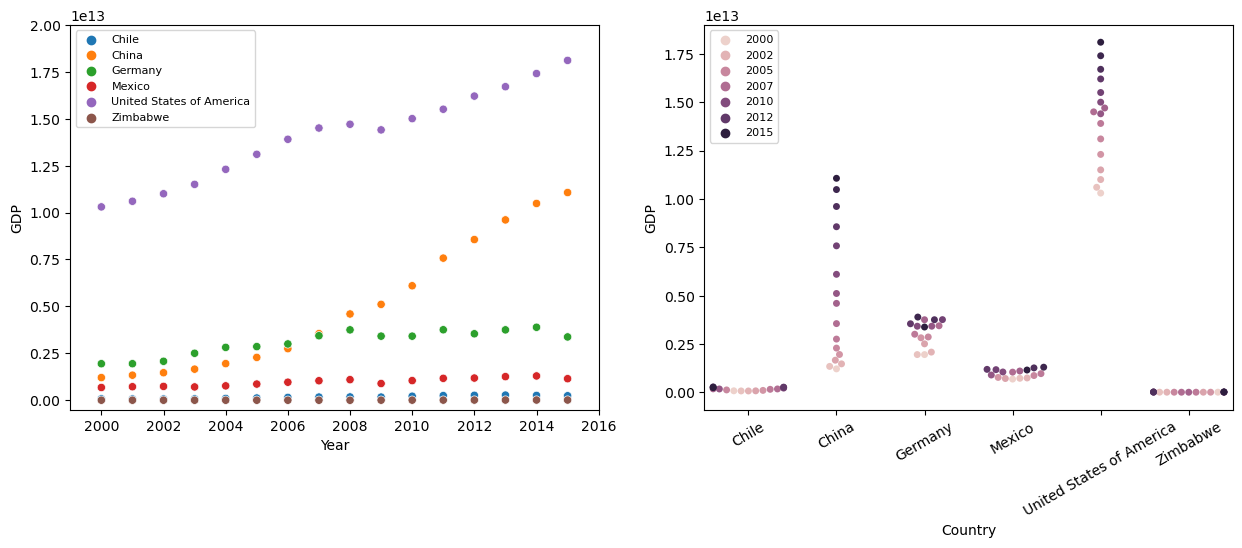

<Figure size 640x480 with 0 Axes>

In [250]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = "Year", y="GDP", hue = "Country", data = life_exp_gdp)
plt.axis([1999,2016,-0.05e13, 2e13])
plt.legend(fontsize =8, loc = 2)

plt.subplot(1,2,2)
sns.swarmplot(data=life_exp_gdp, x="Country", y="GDP", hue="Year")
plt.xticks(rotation = 30)
plt.subplots_adjust(wspace=0.2)
plt.legend(fontsize =8, loc=2)

plt.show()
plt.clf()

C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

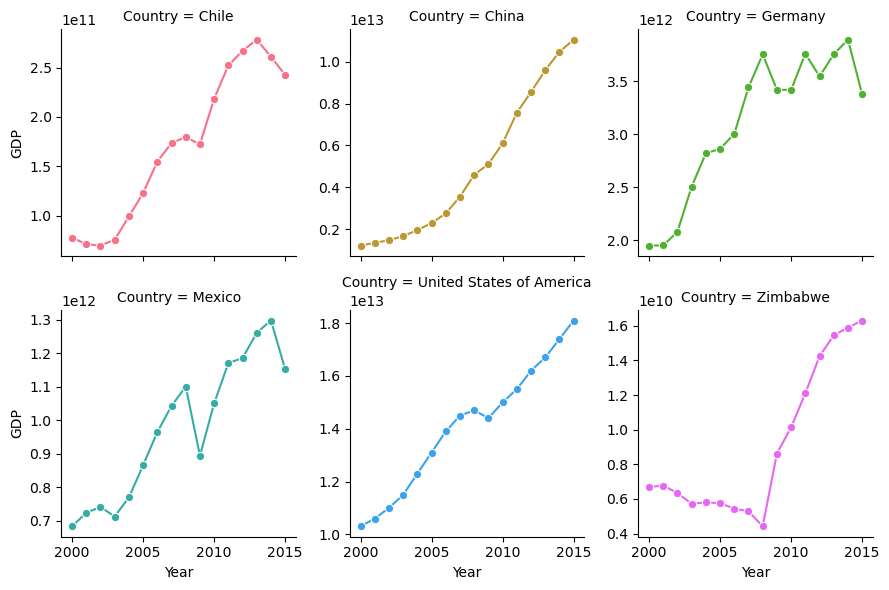

<Figure size 640x480 with 0 Axes>

In [251]:
#Plot each country GDP
grid = sns.FacetGrid(life_exp_gdp, col="Country", hue="Country", palette="husl", col_wrap=3, sharey=False)
grid.map(sns.lineplot, "Year", "GDP", marker="o")
grid.set_axis_labels("Year", "GDP")

plt.show()
plt.clf()

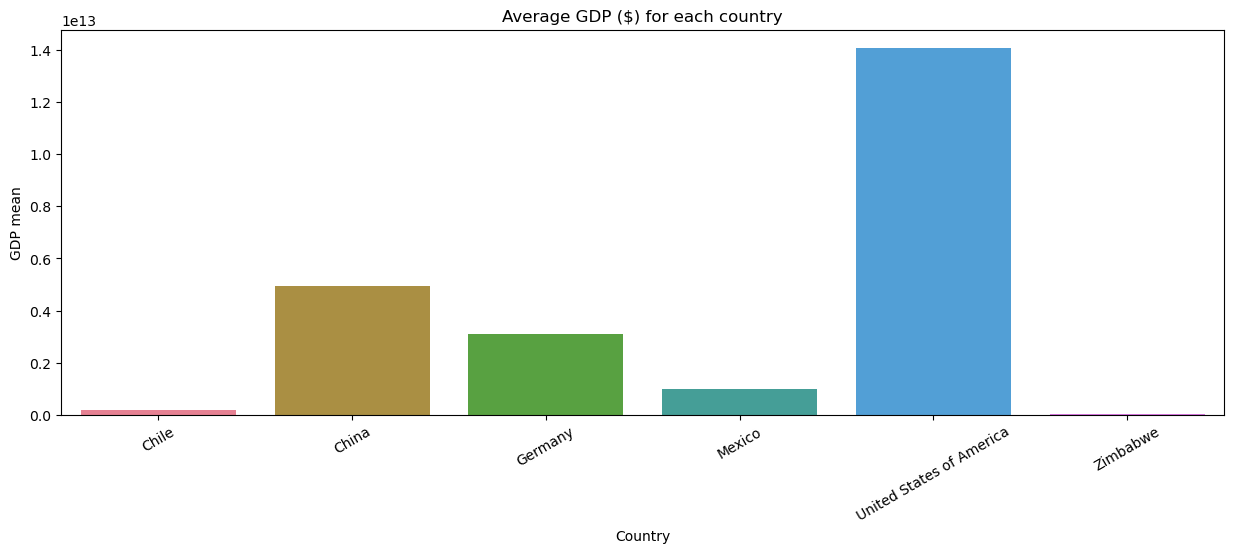

<Figure size 640x480 with 0 Axes>

In [252]:
#Plot average for GDP for each country
plt.figure(figsize=(15,5))
sns.barplot(x="Country", y="GDP mean", data = gdp_mean, palette = "husl")
plt.xticks(rotation = 30)
plt.title("Average GDP ($) for each country")

plt.show()
plt.clf()

## Is there a correlation between GDP and life expectancy of a country?

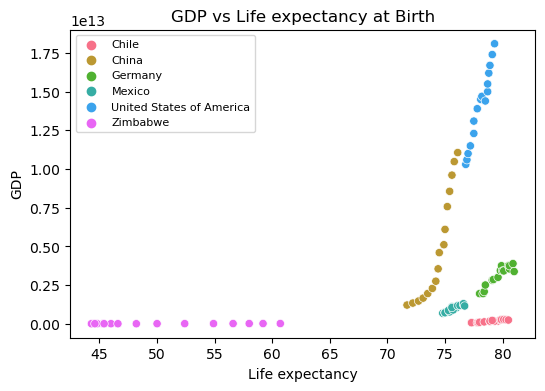

<Figure size 640x480 with 0 Axes>

In [265]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Life expectancy", y="GDP", hue="Country", data = life_exp_gdp, palette= "husl")
plt.legend(fontsize=8)
plt.title("GDP vs Life expectancy at Birth")
plt.show()
plt.clf()

## What is the average life expectancy in these nations?

In [254]:
life_exp_mean = life_exp_gdp.groupby(["Country"])["Life expectancy"].mean().reset_index()\
                        .rename(columns={"Life expectancy": "Life expectancy mean"})
life_exp_mean

,Country,Life expectancy mean
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,United States of America,78.06250
5,Zimbabwe,50.09375


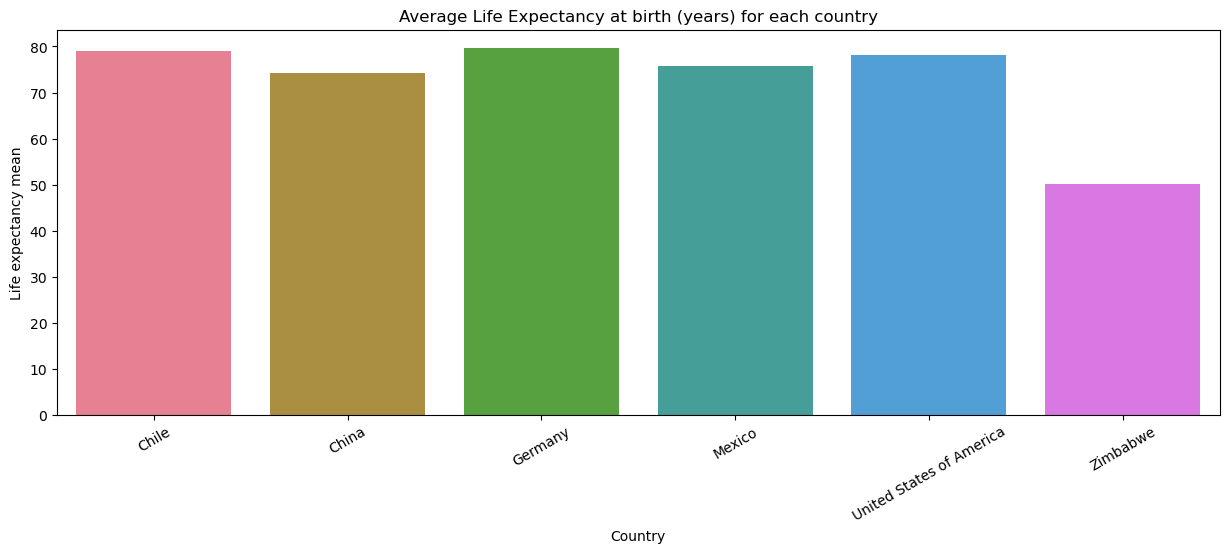

<Figure size 640x480 with 0 Axes>

In [255]:
#Plot average for life expectancy for each country
plt.figure(figsize=(15,5))
sns.barplot(x="Country", y="Life expectancy mean", data = life_exp_mean, palette = "husl")
plt.xticks(rotation = 30)
plt.title("Average Life Expectancy at birth (years) for each country")

plt.show()
plt.clf()

## What is the distribution of that life expectancy?

C:\Users\filip\AppData\Local\Temp\ipykernel_20400\1858385747.py:19: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(5,5)


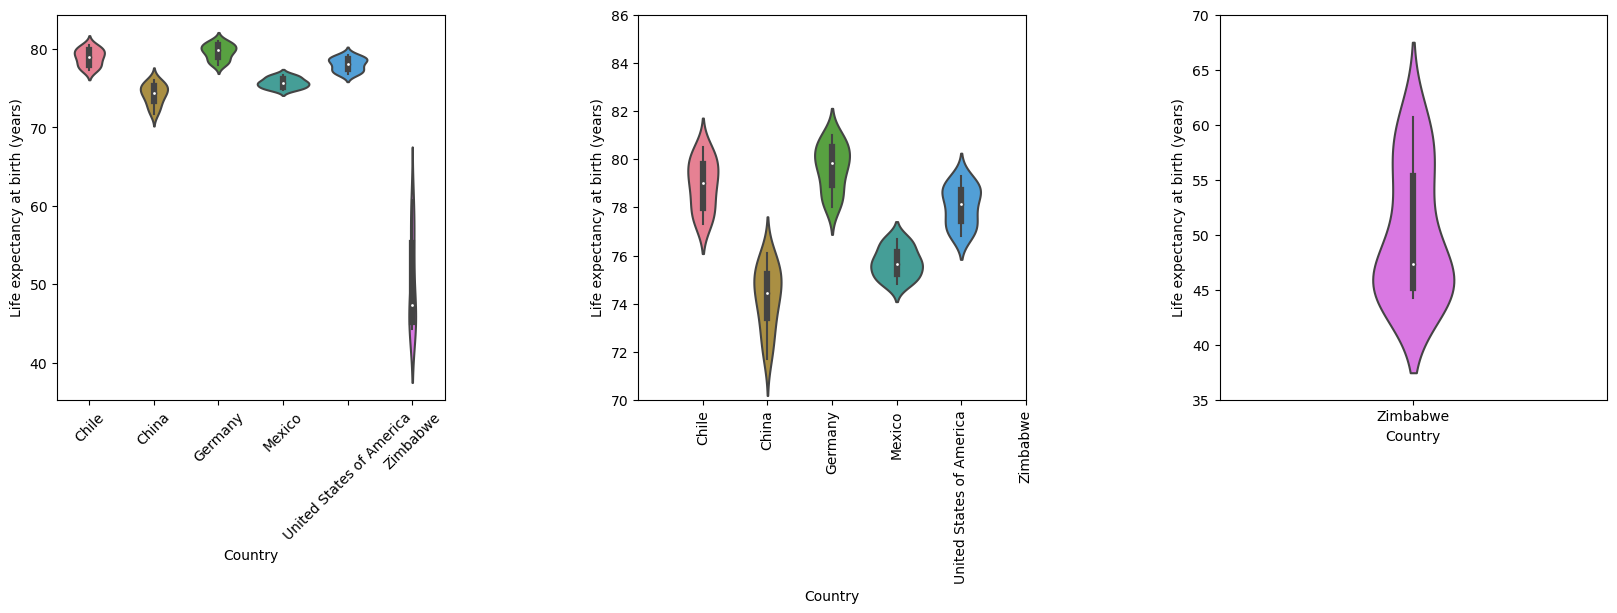

In [310]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.violinplot(data=life_exp_gdp, x="Country", y="Life expectancy", palette="husl")
plt.xticks(rotation = 45)
plt.ylabel("Life expectancy at birth (years)")

plt.subplot(1,3,2)
sns.violinplot(data=life_exp_gdp, x="Country", y="Life expectancy", palette="husl")
plt.xticks(rotation = 90)
plt.ylabel("Life expectancy at birth (years)")
plt.ylim(70,86)
plt.xlim(-1,5)

plt.subplot(1,3,3)
sns.violinplot(data=life_exp_gdp, x="Country", y="Life expectancy", palette="husl")
plt.ylabel("Life expectancy at birth (years)")
plt.ylim(35,70)
plt.xlim(5,5)

plt.subplots_adjust(wspace=0.5)



# Conclusion

This project aims to analyse data obtained from the World Health Organization and from the World Bank regardind GDP (Gross domestic product) and life expectancy at birth and possible relationship between them. Six country were selected for the analysis namely Chile, China, Germany, Mexico, United States of America (USA) and Zimbabwe.

We could observe that there was an increase of life expectancy for every country through the years, from 2000 till 2015. Zimbabwe shows the most steeper rise, from around 45 years old to 60 years old. The remain countries shows an increase from 70 years old to 80 years old.

Regarding GDP, there is an increase along the years for every country. The USA have the highest value of GDP and Zimbabwe has the lowest. We can see that around 2008, Zimbabwe shows a rise on GDP that is coherent with the rise of life expectancy.
We can see a turning point around 2008 with a decline of GDP, some countries more affected than others, like Germany and Chile and unlike China.

There is a positive correlation between the rise of life expectancy and the gain of GDP, being most notable in the countries which has a lower life expectancy to begin with. Although some countries with lower GDPs have similar life expectancy values with countries with higher GDPs, like Chile. This may suggest that other factors may have affect the rise of life expectancy, and that maybe the slightest increase of the country GDP could lead to some improves within the country, like in the health sector that contribute to this higher life expectancy.